In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import rebound
import CreateMovie as movie
from matplotlib.patches import Circle
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import interp1d
from RV_stab import *
import scipy.optimize as op
import emcee
import corner

%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=1.0)
colors = ['4D4D4D','5DA5DA', 'FAA43A', '60BD68', 'F17CB0','B2912F','B276B2','DECF3F','F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
mpl.rcParams['axes.color_cycle'] = colors

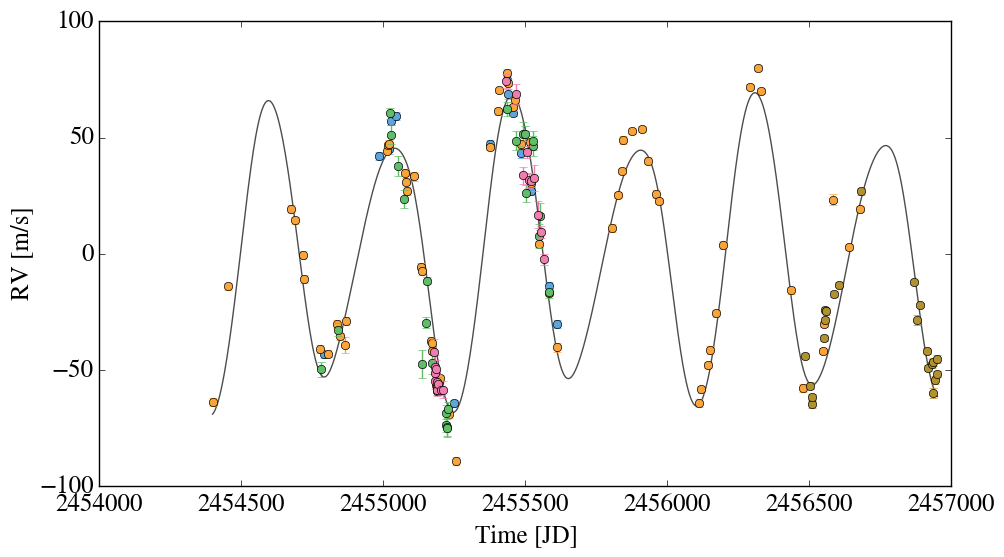

In [9]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.add_planet(per = 429.96951043, mass = 2.979157 , M = 63.748569, e=0.041800, pomega = 136.84729)
HD1502.add_planet(per = 765.37792853, mass =  0.321007, M = 118.50653, e=0.051500, pomega = 75.245987)
HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [3]:
print HD1502.calc_chi2()/(152-20)

1475.61833498


In [27]:
ratio_1 = (HD1502.planets[0].per/HD1502.planets[1].per)**(-1)
ratio_2 = (HD1502.planets[1].per/HD1502.planets[2].per)
ratio_3 = (HD1502.planets[0].per/HD1502.planets[2].per)


print ratio_1,ratio_2,ratio_3

1.78007488895 2.73249067807 1.53504253952


 0 %
 9 %
Integration took 0.72181 seconds
Energy Error is 18.339% 


0

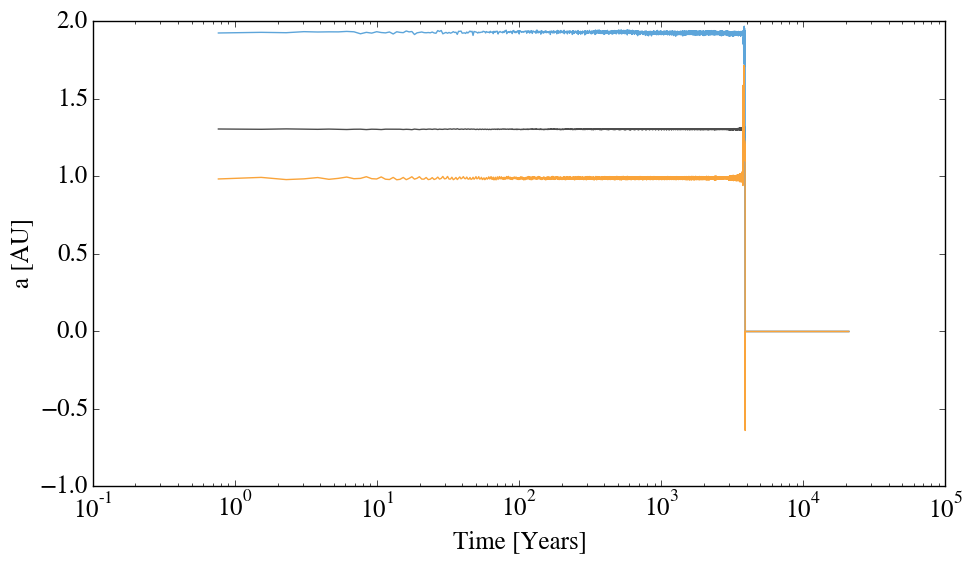

In [4]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=5,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
99 %
Integration took 33.88483 seconds
Energy Error is 0.000% 


1

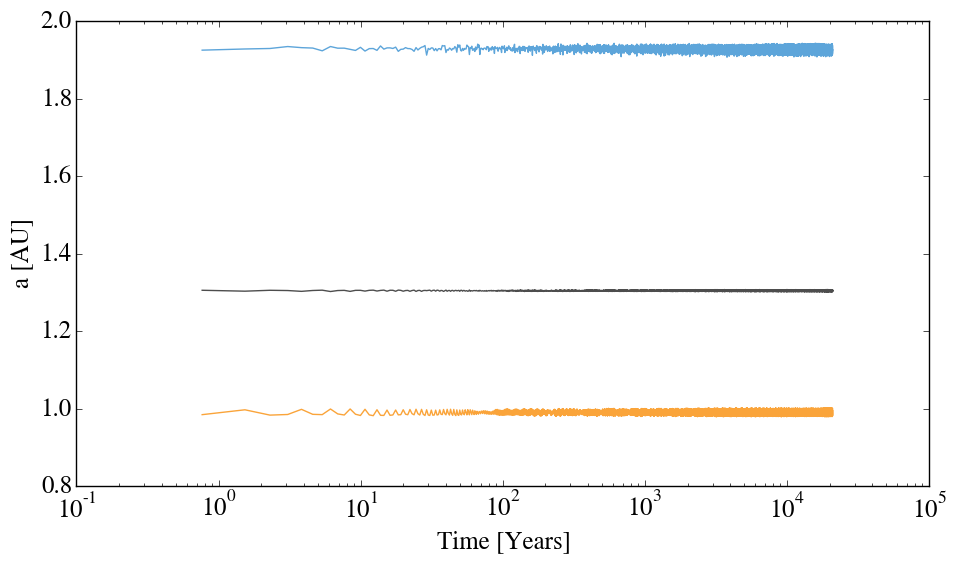

In [7]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=10,outputs_per_period=1,verbose=1,integrator='ias15',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [5]:
for planet in HD1502.planets:
    print planet.per, planet.mass

429.96951043 0.00284384368906
765.37792853 0.00030642686206
280.10266775 0.0004074720188


In [7]:
print 765.378/429.9695, 429.9565/280.10266775

1.78007509835 1.53499609073


In [29]:
(3*HD1502.planets[0].l-2*HD1502.planets[2].l-HD1502.planets[2].pomega)%(360)

351.24570700000004

In [30]:
(3*HD1502.planets[0].l-2*HD1502.planets[2].l-HD1502.planets[0].pomega)%(360)

171.24570700000004

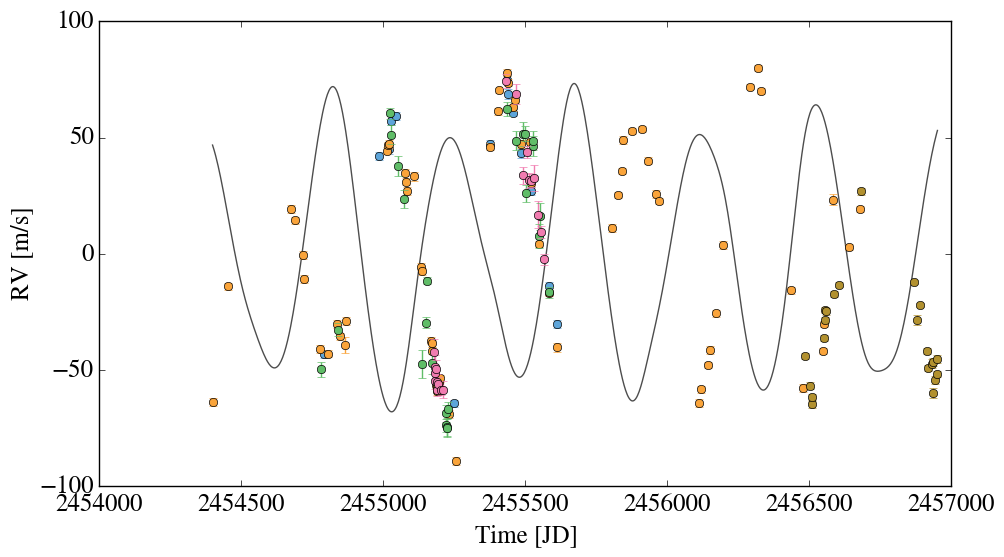

In [7]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.add_planet(per = 429.96951043, mass = 2.979157 , M = 63.748569, e=0.041800, pomega = 136.84729+180)
HD1502.add_planet(per = 765.37792853, mass =  0.321007, M = 118.50653, e=0.051500, pomega = 75.245987)
HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

 0 %
 9 %
Integration took 0.61803 seconds
Energy Error is 18.339% 


0

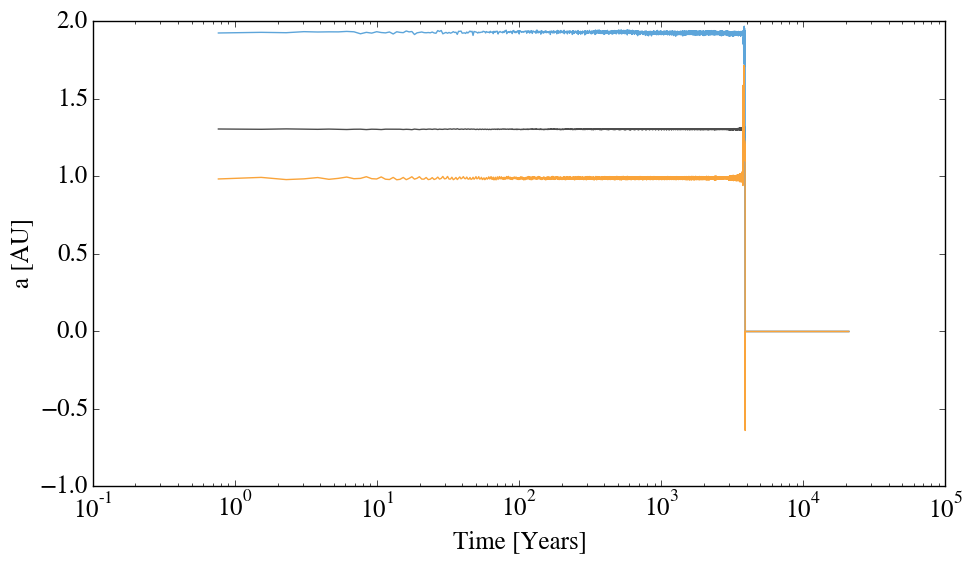

In [13]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=5,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [8]:
t0 = time.time()
print HD1502.stab_logprob()
print "That took %.5f seconds" %(time.time() - t0)

-inf
That took 0.30865 seconds


In [6]:
def per_mass_test(params,other_params,RVsys):
    per_0, per_1, per_2 = params
    M, e, pomega, i, Omega = other_params
    RVsys.rem_planet()
    RVsys.add_planet(per=per,mass=mass,M=M,e=e,pomega=pomega,i=i,Omega=Omega)
    return -RVsys.log_like()

-97632.994732169158